Planted motifs (prime intervals, dynamic range): 4351
Motif indexes (prime intervals, dynamic range): [0, 5, 12, 23, 36, 53, 72, 95, 124, 155, 192, 233, 276, 281, 288, 299, 312, 329, 348, 371, 400, 431, 468, 509, 552, 557, 564, 575, 588, 605, 624, 647, 676, 707, 744, 785, 828, 833, 840, 851, 864, 881, 900, 923, 952, 983, 1020, 1061, 1104, 1109, 1116, 1127, 1140, 1157, 1176, 1199, 1228, 1259, 1296, 1337, 1380, 1385, 1392, 1403, 1416, 1433, 1452, 1475, 1504, 1535, 1572, 1613, 1656, 1661, 1668, 1679, 1692, 1709, 1728, 1751, 1780, 1811, 1848, 1889, 1932, 1937, 1944, 1955, 1968, 1985, 2004, 2027, 2056, 2087, 2124, 2165, 2208, 2213, 2220, 2231, 2244, 2261, 2280, 2303, 2332, 2363, 2400, 2441, 2484, 2489, 2496, 2507, 2520, 2537, 2556, 2579, 2608, 2639, 2676, 2717, 2760, 2765, 2772, 2783, 2796, 2813, 2832, 2855, 2884, 2915, 2952, 2993, 3036, 3041, 3048, 3059, 3072, 3089, 3108, 3131, 3160, 3191, 3228, 3269, 3312, 3317, 3324, 3335, 3348, 3365, 3384, 3407, 3436, 3467, 3504, 3545, 3588, 3593, 3600,

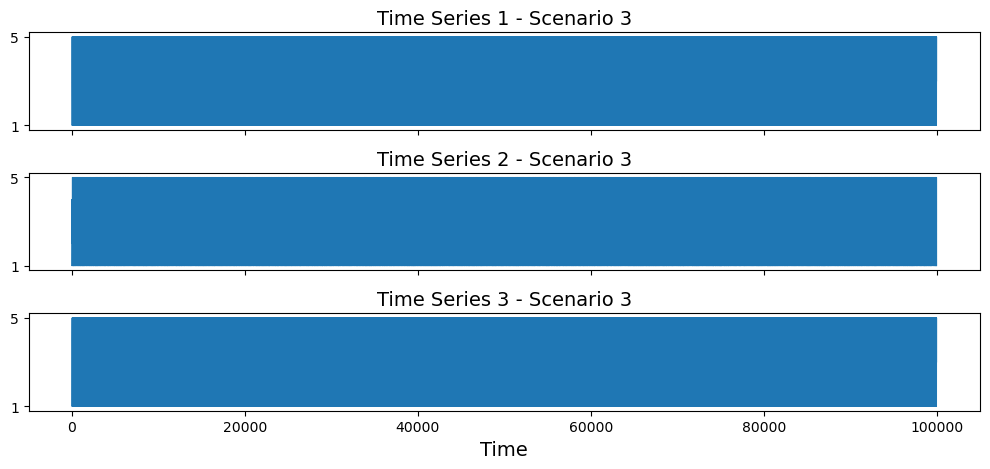

Plot saved for scenario 3.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(0)

class TimeSeriesMotifGenerator:
    def __init__(self, n=1000, k=3, motif_pattern=[1, 1, 1, 1, 1], output_path="../data/syntheticdata/", image_path="../images/"):
        """
        Initialize the generator with the time series length, number of series, motif pattern, and output paths.
        """
        self.n = n
        self.k = k
        self.motif_pattern = motif_pattern
        self.p = len(motif_pattern)
        self.output_path = output_path
        self.image_path = image_path
        self.data = np.random.randint(1, 6, (k, n))
        self.motif_indexes_scenario1 = []
        self.motif_indexes_scenario2 = []
        self.motif_indexes_scenario3 = []

    def plant_motifs_fixed_interval(self, initial_step=10, alternate_step=15):
        """
        Insert the motif pattern at intervals in the time series with alternating steps.
        Parameters:
        - initial_step: The first step size for intervals.
        - alternate_step: The step size to alternate with after each interval.
        """
        index, step = 0, initial_step
        while index < self.n:
            if index + self.p <= self.n:
                self.motif_indexes_scenario1.append(index)
                self.data[:, index:index + self.p] = self.motif_pattern
            step = alternate_step if step == initial_step else initial_step  # Alternate between initial_step and alternate_step
            index += step
        print(f"Planted motifs (fixed interval): {len(self.motif_indexes_scenario1)}")
        print("Motif indexes (fixed interval):", self.motif_indexes_scenario1)

    def plant_motifs_prime_intervals(self, min_step=5, max_step=50, target_columns=None):
        """
        Insert motifs at intervals based on prime numbers within a specified range,
        only in specified columns.

        Parameters:
        - min_step: Minimum step size.
        - max_step: Maximum step size.
        - target_columns: List of column indices where motifs should be planted.
        """
        def generate_primes_in_range(min_val, max_val):
            primes = []
            for num in range(min_val, max_val + 1):
                if num > 1:
                    for i in range(2, int(num ** 0.5) + 1):
                        if num % i == 0:
                            break
                    else:
                        primes.append(num)
            return primes

        # Check and default to all columns if target_columns is not specified
        if target_columns is None:
            target_columns = range(self.data.shape[0])

        # Generate primes within the specified range
        prime_steps = generate_primes_in_range(min_step, max_step)
        if not prime_steps:
            raise ValueError(f"No prime numbers found in the range {min_step} to {max_step}.")

        index, i = 0, 0
        while index < self.n:
            if index + self.p <= self.n:
                self.motif_indexes_scenario3.append(index)
                # Plant the motif only in the specified columns
                for col in target_columns:
                    self.data[col, index:index + self.p] = self.motif_pattern
            # Select the next prime interval, cycling through the list
            step = prime_steps[i % len(prime_steps)]
            index += step
            i += 1

        print(f"Planted motifs (prime intervals, dynamic range): {len(self.motif_indexes_scenario3)}")
        print("Motif indexes (prime intervals, dynamic range):", self.motif_indexes_scenario3)



    def plant_motifs_random_interval(self, max_interval=None):
        """
        Insert the motif pattern at random intervals with a maximum interval between motifs.
        Parameters:
        - max_interval: The maximum interval size between motifs, calculated based on `n` if not provided.
        """
        if max_interval is None:
            max_interval = self.n // 50  # Default maximum interval
        print("Max interval between motifs:", max_interval)
        last_index = 0
        while True:
            min_interval = self.p + 10
            index_interval = np.random.randint(min_interval, self.p + max_interval)
            if last_index + index_interval + self.p > self.n:
                break
            last_index += index_interval
            self.motif_indexes_scenario2.append(last_index)
            self.data[:, last_index:last_index + self.p] = self.motif_pattern
        print(f"Planted motifs (random interval): {len(self.motif_indexes_scenario2)}")
        print("Motif indexes (random interval):", self.motif_indexes_scenario2)

    def save_data(self, scenario=1, initial_step=10, alternate_step=15, min_step=None , max_step=None):
        """
        Save the generated data and motif indexes to CSV files for the specified scenario.
        Uses instance attributes for n, k, output_path, and data, along with scenario-specific parameters.
        """
        os.makedirs(self.output_path, exist_ok=True)
        
        # Construct dynamic file names based on scenario parameters
        if scenario == 1:
            filename_suffix = f"initial_step={initial_step}_alt_step={alternate_step}"
            motif_indexes = self.motif_indexes_scenario1
        elif scenario == 2:
            filename_suffix = f"max_interval={max_interval}" if max_interval is not None else f"max_interval={self.n // 50}"
            motif_indexes = self.motif_indexes_scenario2
        elif scenario == 3:
            filename_suffix = f"min_step={min_step}_max_step={max_step}"
            motif_indexes = self.motif_indexes_scenario3
        
        # Generate filenames with dynamic suffixes
        data_filename = f"{self.output_path}scenario{scenario}_n={self.n}_k={self.k}_p={self.p}_{filename_suffix}.csv"
        indexes_filename = f"{self.output_path}motif_indexes_scenario{scenario}_n={self.n}_k={self.k}_p={self.p}_{filename_suffix}.csv"
        
        # Save data and motif indexes to respective files
        np.savetxt(data_filename, self.data, delimiter=",")
        np.savetxt(indexes_filename, motif_indexes, delimiter=",")
        
        print(f"Data and motif indexes saved for scenario {scenario}.")
        print(f"Data file: {data_filename}")
        print(f"Motif indexes file: {indexes_filename}")



    def plot_data(self, scenario=1):
        """
        Plot the time series data with highlighted motifs for the specified scenario.
        """
        fig, axes = plt.subplots(nrows=self.k, ncols=1, figsize=(10, 5), sharex=True)
        motif_indexes = self.motif_indexes_scenario1 if scenario == 1 else self.motif_indexes_scenario2
        for i in range(self.k):
            ax = axes[i]
            ax.plot(self.data[i], linewidth=0.5)
            ax.set_yticks([1, 5])
            ax.set_title(f"Time Series {i+1} - Scenario {scenario}", fontsize=14)
            for idx in motif_indexes:
                ax.axvline(x=idx, color='r', linestyle='--', linewidth=1)
        
        plt.xlabel("Time", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        
        os.makedirs(self.image_path, exist_ok=True)
        plt.savefig(f"{self.image_path}data_synthetic_scenario{scenario}_n={self.n}_k={self.k}_p={self.p}.png")
        plt.show()
        print(f"Plot saved for scenario {scenario}.")

    def generate_and_save(self, scenario=1, initial_step=10, alternate_step=15, min_step=None, max_step=None):
        """
        High-level function to generate the time series data, plant motifs, save data, and plot the series.
        Parameters:
        - scenario: Choose 1 for fixed interval or 2 for random interval planting.
        - initial_step: First step size for the fixed interval scenario.
        - alternate_step: Second step size to alternate with in the fixed interval scenario.
        - min_step: Minimum step size 
        - max_step: Maximum step size
        """
        if scenario == 1:
            self.plant_motifs_fixed_interval(initial_step=initial_step, alternate_step=alternate_step)
            self.save_data(scenario=scenario, initial_step=initial_step, alternate_step=alternate_step)
        elif scenario == 2:
            self.plant_motifs_random_interval(max_step=max_step)
            self.save_data(scenario=scenario, max_step=max_step)
        elif scenario == 3:
            self.plant_motifs_prime_intervals(min_step=min_step, max_step=max_step)
            self.save_data(scenario=scenario, min_step=min_step, max_step=max_step)
        self.plot_data(scenario=scenario)

# Example usage
generator = TimeSeriesMotifGenerator(n=100000, k=3, motif_pattern=[1, 1, 1, 1, 1], output_path="../data/syntheticdata/", image_path="../images/")
#generator.generate_and_save(scenario=1, initial_step=10, alternate_step=25)  # Generate for scenario 1 with custom initial and alternate steps
#generator.generate_and_save(scenario=2, max_step=20)  # Generate for scenario 2 with custom max interval
generator.generate_and_save(scenario=3, min_step=5, max_step=45)  # Generate for scenario 3 with prime intervals
